In [2]:
from statistics import LinearRegression

import numpy as np
from sklearn.datasets import fetch_california_housing
import pandas as pd

cali = fetch_california_housing()
x = pd.DataFrame(cali.data, columns=cali.feature_names)
y  = pd.Series(cali.target, name="MedHouseVal")
df = pd.concat([x, y], axis=1)

In [4]:
df.shape

(20640, 9)

In [5]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [14]:
import matplotlib.pyplot as plt

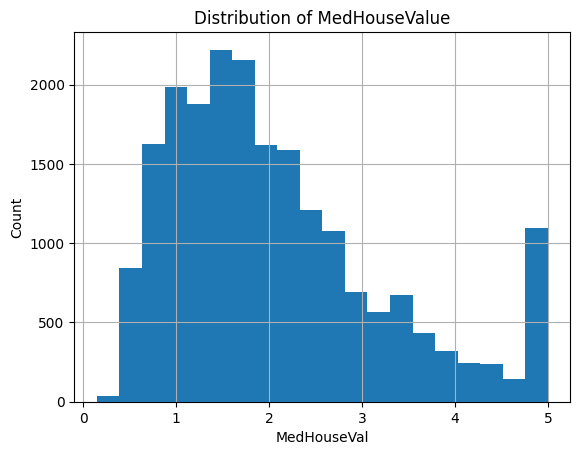

In [15]:
df['MedHouseVal'].hist(bins=20)
plt.title("Distribution of MedHouseValue")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.show()

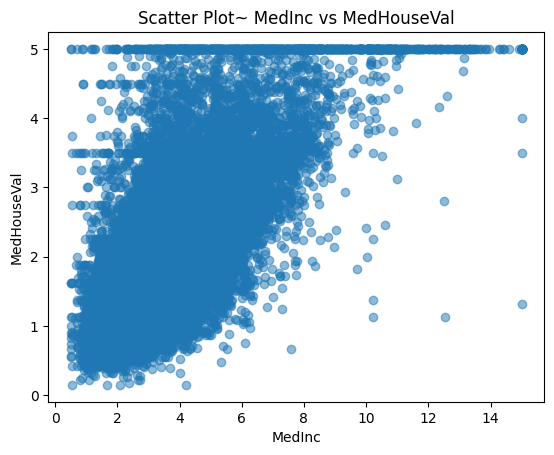

In [16]:
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.title("Scatter Plot~ MedInc vs MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

In [ ]:
import seaborn as sns
##correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [21]:
# import numpy as np
#
# #add intercept
# X_mat = np.column_stack([np.ones(len(X)), X.values])
# y_vec = y.values.reshape(-1, 1)
#
# beta = np.linalg.inv(X_mat).dot(y_vec)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression().fit(x_train, y_train)

In [43]:
y_pred = model.predict(x_test)

In [44]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²:   {r2:.3f}")

Test RMSE: 0.556
Test R²:   0.576


## Feature Scaling/Regularization/Polynomial_Features

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, r2_score

##split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [46]:
##scale features
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
##train using scaled data
model = LinearRegression().fit(x_train_scaled, y_train)

In [49]:
##predict/evaluate
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"Scaled Test RMSE: {rmse:.3f}")
print(f"Scaled Test R²:   {r2:.3f}")

Scaled Test RMSE: 0.746
Scaled Test R²:   0.576


In [55]:
from sklearn.pipeline         import Pipeline
from sklearn.preprocessing    import StandardScaler, PolynomialFeatures
from sklearn.linear_model     import Ridge
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import mean_squared_error, r2_score
import numpy as np

# 1) Pipeline: scale → polynomial expansion → ridge
pipe_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge",  Ridge())
])

In [56]:
# 2) Expanded α grid (include smaller values)
param_grid = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10]
}

# 3) 5-fold CV search on MSE
search_poly = GridSearchCV(
    pipe_poly,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
search_poly.fit(x_train, y_train)

,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,"{'ridge__alpha': [0.001, 0.01, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [57]:
best_alpha = search_poly.best_params_["ridge__alpha"]
y_pred = search_poly.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"Best α (poly):       {best_alpha}")
print(f"Poly-Ridge Test RMSE: {rmse:.3f}")
print(f"Poly-Ridge Test R²:   {r2:.3f}")

Best α (poly):       10
Poly-Ridge Test RMSE: 0.672
Poly-Ridge Test R²:   0.656
